In [24]:
#My project!

In [ ]:
pip install selenium

In [ ]:
#comment scraper.

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.common.exceptions import TimeoutException,ElementClickInterceptedException

comment2 = []
title = []
URL = "https://www.imdb.com/title/tt6139732/reviews?sort=submissionDate&dir=asc&ratingFilter=0" #make sure its in ascending.

driver = webdriver.Chrome(r'C:\Users\surba\Desktop\chromedriver.exe')
wait = WebDriverWait(driver,10)

driver.get(URL)
soup = BeautifulSoup(driver.page_source, 'lxml')

while True:
    try:
        driver.find_element_by_css_selector("button#load-more-trigger").click()
        wait.until(EC.invisibility_of_element_located((By.CSS_SELECTOR,".ipl-load-more__load-indicator")))
        soup = BeautifulSoup(driver.page_source, 'lxml')

    except Exception:
        break
for elem in soup.find_all(class_='imdb-user-review'):
            name = elem.find(class_='title').get_text(strip=True)
            comment = elem.find(class_='content').get_text(strip=True)
            comment2.append(comment)
            title.append(name)

            

#print(name)
finals ='\n\n'.join(title)
final = '\n\n'.join(comment2)
print(final)
print(finals)
driver.quit()

In [ ]:
#lemmatize the wirds
import pandas as pd
import numpy as np
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import KFold
from textblob import TextBlob,Word


IMDB = pd.read_csv('IMDB Dataset.csv')
#comment = comment.dropna(subset=['review'],axis=0)
rotten = pd.read_csv('rotten.csv')
#IMDB.index.names = [None]

english_stop_words = ENGLISH_STOP_WORDS

#stemmer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

def to_lower(corpus):
    return [' '.join([word.lower() for word in comment.split(' ')]) for comment in corpus]

def remove_symbols(corpus):
    corpus = re.sub(r'\W+', ' ',corpus)
    corpus = re.sub(" \d+", " ", corpus)
    corpus = re.sub(' s ', ' ',corpus)
    corpus = re.sub(' ve ', ' ',corpus)
    corpus = re.sub(' m ', ' ',corpus)
    corpus = re.sub(' t ', ' ',corpus)
    return corpus

def stemmed(corpus):
    return [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in corpus]


def remove(corpus):
    removed = []
    for comment in corpus:
        removed.append(' '.join([word for word in comment.split(' ') if word not in english_stop_words]))
    
    return removed
                       
IMDB['clean'] = to_lower(IMDB['review'])
IMDB['clean'] = IMDB['clean'].apply(lambda x:remove_symbols(x))
IMDB['clean'] = remove(IMDB['clean'])
IMDB['clean'] = stemmed(IMDB['clean'])

#print(IMDB['clean'].iloc[40:100])

IMDB.to_csv('IMDB1.csv')

In [11]:
#This was the model that I used to analyze the sentiments of the IMDB
#Review titles.


import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,SGDClassifier,LinearRegression 
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier




IMDB = pd.read_csv('IMDB1.csv')
#comment = comment.dropna(subset=['review'],axis=0)
#rotten = pd.read_csv('rotten.csv')
#IMDB.index.names = [None]
#rotten.index.names = [None]
#frames = [IM, rotten]
#IMDB = pd.concat(frames)
#removes special characters.

IMDB['review'] = IMDB['review'].map(lambda x: re.sub(r'\W+', ' ', x))
#IMDB['review'] = IMDB['review'].map(lambda x: [word.lower for word in x])
IMDB = IMDB.reset_index(drop=True)
#print(IMDB['review']) 

#counts number of sentiment values.
#IMDB['sentiment'].value_counts()
kf5 = KFold(n_splits=10,shuffle=True)


#____________

y=IMDB['sentiment']


X = IMDB['clean']

#train_review,test_review,train_sentiment,test_sentiment = train_test_split(X,y,test_size=0.2)





#model = DecisionTreeClassifier()
model = SGDClassifier()
def get_score(model,X,y):
    model.fit(train_review,train_sentiment)
    model.score(test_review,test_sentiment)
    
bagger = text.CountVectorizer(stop_words = 'english')


for train_index,test_index in kf5.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train=bagger.fit_transform(X_train)
    X_test = bagger.transform(X_test)
    
    model.fit(X_train,y_train)
    
    #predict = model.predict(X_test)
    #scores.append(model.score(X_test,y_test))
    print(model.score(X_test,y_test))
#prints accuracy score
#lr_score=accuracy_score(test_sentiment,lr_predict)
#print(lr_score)



#Here I print out classification report.
#lr_report = classification_report(test_sentiment,lr_predict)
#print(lr_report)
#Here I print out confusion matrix.
#lr_confusion = confusion_matrix(test_sentiment,lr_predict)
#print(lr_confusion)

0.8776
0.8796
0.8784
0.876
0.8656
0.8782
0.8788
0.8732
0.8732
0.8826


In [5]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


[0.02392489400363423, 2.0216535433070923, 5.347213809812251, 1.1244700181708087, 0.0, 0.09569957601453692, 4.330405814657795, 7.978952150212016, 12.596153846153847, 2.423076923076923, 9.442307692307692, 4.615384615384615, 0.057692307692307696, 0.2692307692307692, 0.1346153846153846]


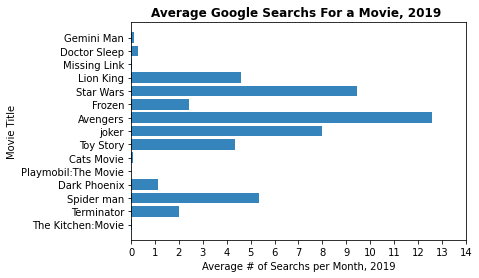

In [6]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


list1=['Star Wars','The Kitchen:Movie','Terminator','Spider man','Dark Phoenix']
list2 = ['Star Wars','Playmobil:The Movie','Cats Movie','Toy Story','joker']

pytrends1 = TrendReq(hl='en-US',tz=360)
pytrends2 = TrendReq(hl='en-US',tz=360)
pytrends1.build_payload(list1,timeframe='2019-01-01 2019-12-30',cat=3)
pytrends2.build_payload(list2,timeframe='2019-01-01 2019-12-30',cat=3)
df1 = pytrends1.interest_over_time()
df2= pytrends2.interest_over_time()
averageList1=[]
averageList2=[]
for item in list1:
    averageList1.append(df1[item].mean())
for item in list2:
    averageList2.append(df2[item].mean())

#print(averageList1)
#print(averageList2)


list3=['Avengers','Frozen','Star Wars']
list4 = ['Avengers','Lion King','Missing Link','Doctor Sleep','Gemini Man']
pytrends3 = TrendReq(hl='en-US',tz=360)
pytrends4 = TrendReq(hl='en-US',tz=360)
#I set cat as 3, so that the category that we're looking for these 
#terms is under arts and entertainement.

#The timeframe is also set between January 1st to December 30th.
pytrends3.build_payload(list3,timeframe='2019-01-01 2019-12-30',cat=3)
pytrends4.build_payload(list4,timeframe='2019-01-01 2019-12-30',cat=3)

df3 = pytrends3.interest_over_time()
df4= pytrends4.interest_over_time()
averageList3=[]
averageList4=[]
for item in list3:
    averageList3.append(df3[item].mean())
for item in list4:
    averageList4.append(df4[item].mean())
#print(averageList3)
#print(averageList4)


#star wars 19.538, 12.1538;
normalizationFactor1=0.62204724409449
normalization = averageList1[0]*normalizationFactor1
for i in range(len(averageList1)):
    normalisedVal=normalizationFactor1*averageList1[i]
    averageList1[i]=normalisedVal
for i in range(len(averageList2)):
    normalisedVal=normalizationFactor1*averageList2[i]
    averageList2[i]=normalisedVal
averageList1.pop(0)
averageList2.pop(0)
averageList4.pop(0)
list1.pop(0)
list2.pop(0)
list4.pop(0)

#I print the final list for all of the normalized numbers of each movie.
#I then added these to my dataframe.
finallist = averageList1+averageList2+averageList3+averageList4
print(finallist)
list5 = list1+list2+list3+list4
#print(list5)
#averagelist5 = averageList1+averageList2+averageList3+averageList4
#'The Kitchen:Movie','Terminator','Spider man','Dark Phoenix','Playmobil:The Movie','Cats Movie'
#'Avengers','Star Wars','frozen','Joker','Toy Story','Lion King','Missing Link','Doctor Sleep','Gemini Man'
#print(averagelist5)


import numpy as np
import matplotlib.pyplot as plt

y_pos=np.arange(len(finallist))

plt.barh(y_pos,(finallist),align='center',alpha=0.9)
plt.yticks(y_pos,list5)
plt.xticks(range(0,15,1))
plt.xlabel('Average # of Searchs per Month, 2019')
plt.ylabel('Movie Title')
plt.title('Average Google Searchs For a Movie, 2019 ',fontweight='bold')
plt.show()


    

In [23]:
import pandas as pd
import seaborn as sns;
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

from sklearn import model_selection, metrics



movie = pd.read_csv('test.csv',index_col=0,squeeze=False)
movie = movie.drop(['Extreme','Earning to Cost Ratio','# of Household Names','Like-to-Dislike Ratio','Pique (Relative to Avengers)','(Average) Days Trailer(s) was Released Before In Theaters','Number of Trailers (Over a Million)'], axis = 1)
movie = movie.dropna(axis=0)
movie = movie.astype('int64')
movie['Average IMDB Sentiment Score']=movie['Average IMDB Sentiment Score'].astype('int64')
#movie['Average IMDB Sentiment Score']=movie['Average IMDB Sentiment Score']*100
np.log(movie['Average IMDB Sentiment Score'])
movie=movie.reset_index()
movie
model = smf.ols("Q('Total Box Office')~ Views + Q('Average IMDB Sentiment Score') ",data=movie).fit()
model.summary()
new_movies = pd.DataFrame({'Title':['The Lighthouse','Apollo 11','The Farewell','Marriage Story','Parasite','Uncut Gems','Pain and Glory','Jumanji','Aladdin'],
                        'Views': [15.076033,2.030398,4.768432,11.427189,29.932772,14.465348,4.121642,117.518994,139.440407], 
                        'Average Number of Searches': [2.442307692,1.153846154,2.123745819,1.805183946,6.477424749,0.730769231,0.403846154,13.88461538,98.11705686],
                             'Average IMDB Sentiment Score':[np.log(55.05),np.log(61),np.log(61),np.log(60),np.log(61.55),
                                                             np.log(55),
                                                                    np.log(58.97),np.log(58.6689),np.log(61.1)],
                          'Actual':[18.3,11.97,22.5,2.3,264.4,50.02,37.36,800.1,1051]})

new_movies['Average Number of Searches'] = new_movies['Average Number of Searches'].astype('int64')
new_movies['Average IMDB Sentiment Score'] = new_movies['Average IMDB Sentiment Score'].astype('float64')
new_movies['Views'] = new_movies['Views'].astype('int64')
new_movies['predicted']=abs(model.predict(new_movies))
new_movies

C:\Users\surba\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\surba\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\surba\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1830: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\surba\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


,Title,Views,Average Number of Searches,Average IMDB Sentiment Score,Actual,predicted
0,The Lighthouse,15,2,4.008242,18.30,75.110854
1,Apollo 11,2,1,4.110874,11.97,28.481222
2,The Farewell,4,2,4.110874,22.50,12.543979
3,Marriage Story,11,1,4.094345,2.30,43.236369
4,Parasite,29,6,4.119850,264.40,186.671550
5,Uncut Gems,14,0,4.007333,50.02,67.142233
6,Pain and Glory,4,0,4.077029,37.36,12.543979
7,Jumanji,117,13,4.071910,800.10,887.910216
8,Aladdin,139,98,4.112512,1051.00,1063.219882
